<a href="https://colab.research.google.com/github/kevin-r-murphy/ba820/blob/main/BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Beyond the Headlines: Machine Learning Insights for News Articles**

**Team Members Group 6**: Kevin Murphy, Khushi Manish Jasrapuria, Megha Arul Senthilkumar, Riris Grace Karolina, Shravani Thalla

##**Table of Contents**

1.   Problem Definition
2.   Data Source
3.   Importing Modules and Libraries
4.   Upload the Data
5.   Data Cleaning
6.   Exploratory Data Analysis (EDA)
7.   Analysis

##Problem Definition

Use Unsupervised and Supervised machine learning algorithms like NLP, clustering, logistic regression, decision tree classifer, random forest classifier to classify categories to news article headlines and short descriptions provided and, sentiment analysis, and prioritizing articles accordingly.

Our motivation for this project is to meet the demand for efficient and relevant content management by news organizations to enhance reader satisfaction and engagement.

##Data Source

Our data is sourced from the news dataset news headlines from 2012 to 2022 from HuffPost available on Kaggle: https://www.kaggle.com/datasets/rmisra/news-category-dataset.

Each record in the dataset consists of the following attributes:



1.   link: link to the original news article.
2.   headline: the headline of the news article.
3.   category: category in which the article was published.
4.   short_description: Abstract of the news article.
5.   authors: list of authors who contributed to the article.
6.   date: publication date of the article.

## Importing Modules And Libraries

In [ ]:
#Import all needed modules and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import sklearn
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
import gensim.downloader as api
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Upload the Data

The original data was in the Json format. For analysis purposes, it was uploaded into the Github and converted into a dataframe named df.

In [ ]:
#Read the JSON file into a pandas DataFrame
df = pd.read_json('https://raw.githubusercontent.com/kevin-r-murphy/ba820/main/News_Category_Dataset_v3.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


## Data Cleaning

In [ ]:
#Display information about the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


The dataset was pretty clean when we started working on it itself. Even though there were no null values shown, during the analysis process, we noticed that certain entries consisted empty strings. The fraction of the entries that had empty strings were trivial when compared to the entire dataset, thus we selected only the rows that did not have any blank spaces. We did not want to make any false assumption about the empty strings

In [ ]:
#selects rows where the value in the link column is an empty string
df[df['link']=='']

,link,headline,category,short_description,authors,date


In [ ]:
#selects rows where the value in the headline column is an empty string
df[df['headline']=='']

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [ ]:
#filter the DataFrame to exclude rows where the headline column is an empty string
df=df[df['headline']!='']

In [ ]:
#selects rows where the value in the category column is an empty string
df[df['category']=='']

,link,headline,category,short_description,authors,date


In [ ]:
#selects rows where the value in the short description column is an empty string
df[df['short_description']=='']

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [ ]:
#filter the DataFrame to exclude rows where the short description column is an empty string
df=df[df['short_description']!='']

In [ ]:
#selects rows where the value in the authors column is an empty string
df[df['authors']=='']

,link,headline,category,short_description,authors,date
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,,2022-09-22
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
31,https://www.huffpost.com/entry/2020-census-fal...,Watchdog Report Finds Some Census Takers Who F...,U.S. NEWS,"Despite entering false information, their work...",,2022-09-18
38,https://www.huffpost.com/entry/african-land-sn...,German Customs Officials Follow Trail Of Slime...,WEIRD NEWS,“Never in the history of the Duesseldorf custo...,,2022-09-16
...,...,...,...,...,...,...
209520,https://www.huffingtonpost.comhttp://www.engad...,"First White House Chief Technology Officer, An...",TECH,He was appointed with a fair bit of fanfare as...,,2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
#filter the DataFrame to exclude rows where the authors column is an empty string
df=df[df['authors']!='']

In [ ]:
#selects rows where the value in the date column is an empty string
df[df['date']=='']

,link,headline,category,short_description,authors,date


## Exploratory Data Analysis (EDA)

In [ ]:
#Printing the number of unique values of each column
print(df.nunique())

link                 156859
headline             155944
category                 42
short_description    154932
authors               28312
date                   3889
dtype: int64


We can see that there are 42 different news categories in the dataset

In [ ]:
#Printing the number of articles per each category
categorical_columns = ['category']
for column in categorical_columns:
    print(f"\nDistribution of categories in column '{column}':")
    print(df[column].value_counts())


Distribution of categories in column 'category':
POLITICS          29685
ENTERTAINMENT     13463
WELLNESS          12944
TRAVEL             8024
STYLE & BEAUTY     7275
PARENTING          6520
HEALTHY LIVING     5072
QUEER VOICES       4700
FOOD & DRINK       4527
BUSINESS           4373
COMEDY             3934
SPORTS             3608
HOME & LIVING      3523
PARENTS            3491
BLACK VOICES       3313
IMPACT             2945
WOMEN              2921
WORLD NEWS         2678
THE WORLDPOST      2198
MEDIA              2105
CRIME              2093
WEIRD NEWS         1965
TASTE              1891
RELIGION           1780
WEDDINGS           1705
DIVORCE            1695
GREEN              1682
TECH               1681
MONEY              1539
STYLE              1535
SCIENCE            1428
ARTS & CULTURE     1307
WORLDPOST          1242
U.S. NEWS          1093
FIFTY              1042
GOOD NEWS           917
EDUCATION           893
LATINO VOICES       878
ARTS                863
COLLEGE       

The above distribution of categories shows that "Politics" leads the categories on the total number of article present in the dataset followed by enterntainment, wellness etc., The categories with the least number of articles are culture & arts, Environment etc., The reason behind this might be that people prefer reading categories in this order the most or more incidents take place based on this order.

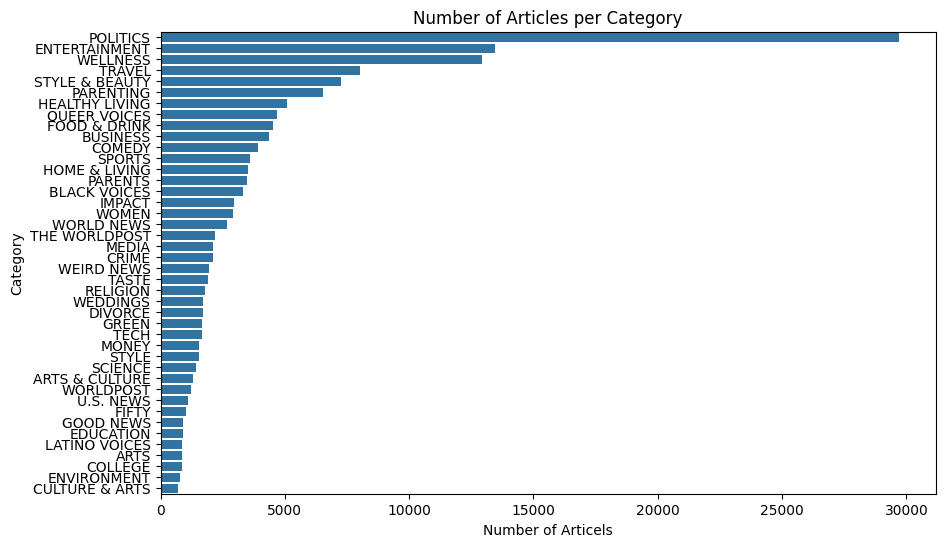

In [ ]:
#Plotting Number of Articles by Category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order = df['category'].value_counts().index)
plt.title('Number of Articles per Category')
plt.xlabel('Number of Articels')
plt.ylabel('Category')
plt.show()

The graph above shows the frequency of nubmer of articles that were published with respect to each of the 42 categories across our dataset. From this, it can be seen clearly that "Politics" is the most common news category from 2012 to 2022, followed by "Entetainmnet" and "Wellness" whereas "Culture and Arts" is the least common.

In [ ]:
#Conveting the date format to extract years for the graphs
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [ ]:
years = sorted(df['year'].unique())
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

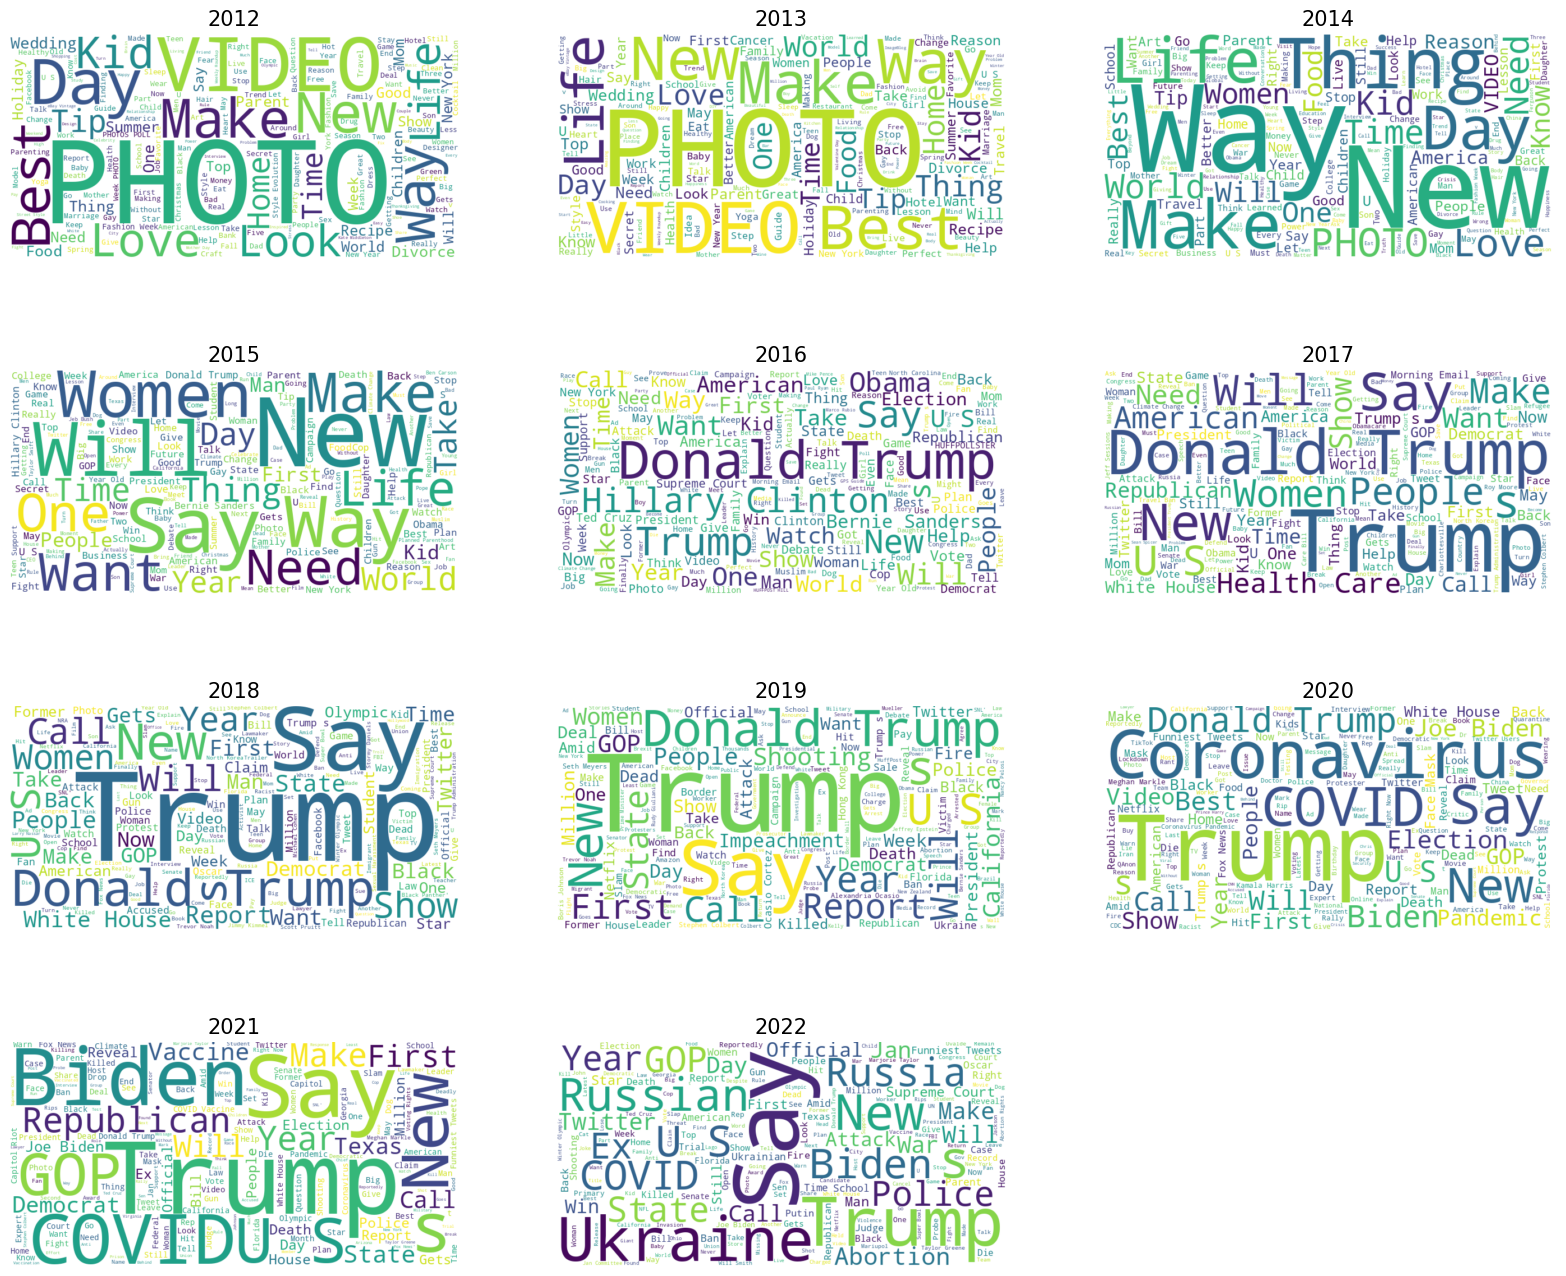

In [ ]:
#Number of rows and grid for subplots
nrows = len(years) // 3 + (len(years) % 3 > 0)
fig, axes = plt.subplots(nrows, 3, figsize=(20, nrows * 4))
fig.subplots_adjust(hspace=0.5)

#Plotting wordcloud for respective years
for ax, year in zip(axes.flatten(), years):
    year_text = ' '.join(df[df['year'] == year]['headline'].dropna().values)

    word_cloud = WordCloud(width=800, height=400, background_color="white").generate(year_text)

    ax.axis("off")
    ax.imshow(word_cloud, interpolation="bilinear")
    ax.set_title(str(year), fontsize=15)

for ax in axes.flatten()[len(years):]:
    ax.axis("off")

plt.show()

Above is the collection of the wordclouds for each year from 2012 to 2022. The words with highest count includes "Trump","Donald", "President","Biden" which supports the fact that "politics" is the most frequently mentioned category.It could also relate to the "entertainment".

After "Politics" related words, we can see the prevalance of the words like "COVID", Coronavirus", "Vaccine" which are related "wellness"

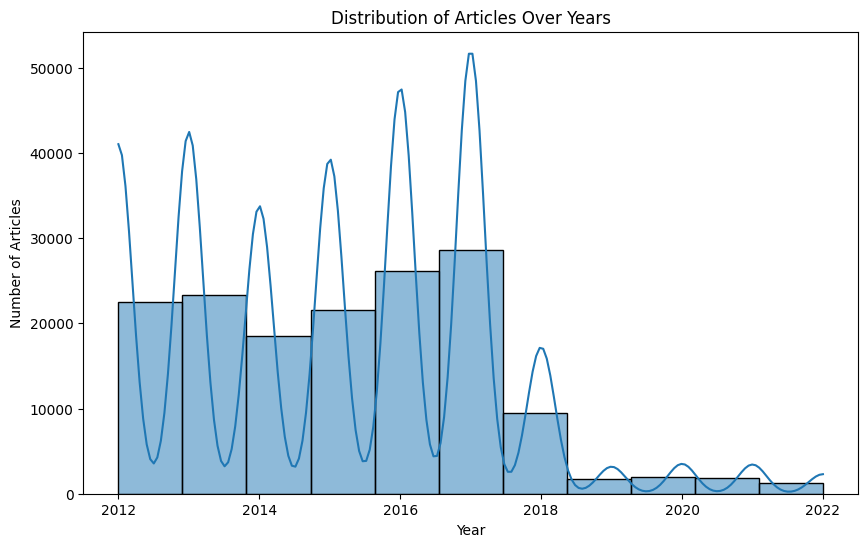

In [ ]:
#Plotting Distribution of Articles over years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=len(df['year'].unique()), kde=True)
plt.title('Distribution of Articles Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

The graph above shows the distribution of news articles in terms of number of articles published each year spanning across a time period of 10 years from 2012 - 2022. It shows how the number of articles published peaked during the years of 2016-2017 but then dropped drastically in the years following 2018 to 2022.

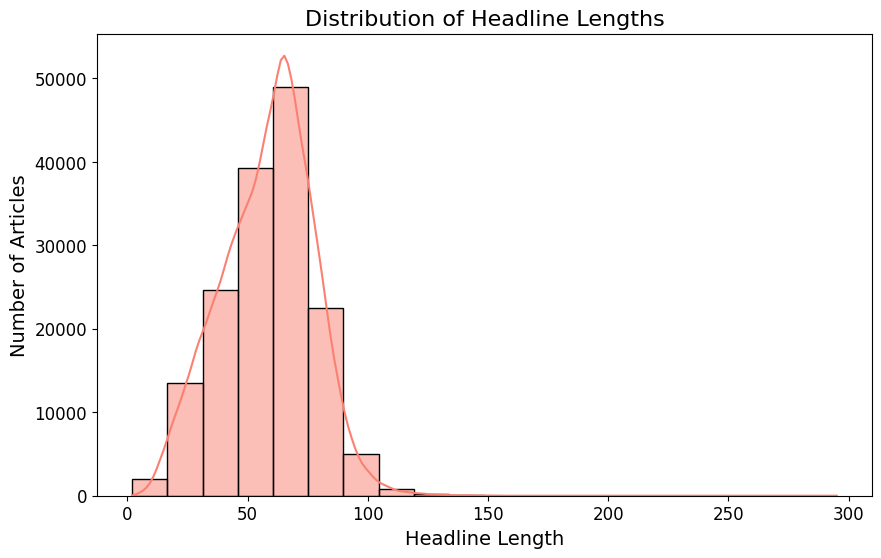

In [ ]:
#Finding length of each headline
df['headline_length'] = df['headline'].apply(len)

#Plotting Distribution of Headline lengths for articles
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This graph shows the distribution of headline lenghts in terms of number of words and shows the frequency for each. As seen clearly, there is a normal distribution and it implies that headlines that have a length of 60-80 are mosr frequent, having a count of >50, as compared to other headline lenghts that range less than 40 words or even greater than 100 words, their count ranges from 0-20 at max.

In [ ]:
"""#Finding length of each short description
df['short_description_length'] = df['short_description'].apply(len)

#Plotting Distribution of Headline lengths for articles
plt.figure(figsize=(10, 6))
sns.histplot(df['short_description'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Short Description Lengths', fontsize=16)
plt.xlabel('Short Description Length', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()"""

"#Finding length of each short description\ndf['short_description_length'] = df['short_description'].apply(len)\n\n#Plotting Distribution of Headline lengths for articles\nplt.figure(figsize=(10, 6))\nsns.histplot(df['short_description'], bins=20, kde=True, color='salmon')\nplt.title('Distribution of Short Description Lengths', fontsize=16)\nplt.xlabel('Short Description Length', fontsize=14)\nplt.ylabel('Number of Articles', fontsize=14)\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=12)\nplt.show()"

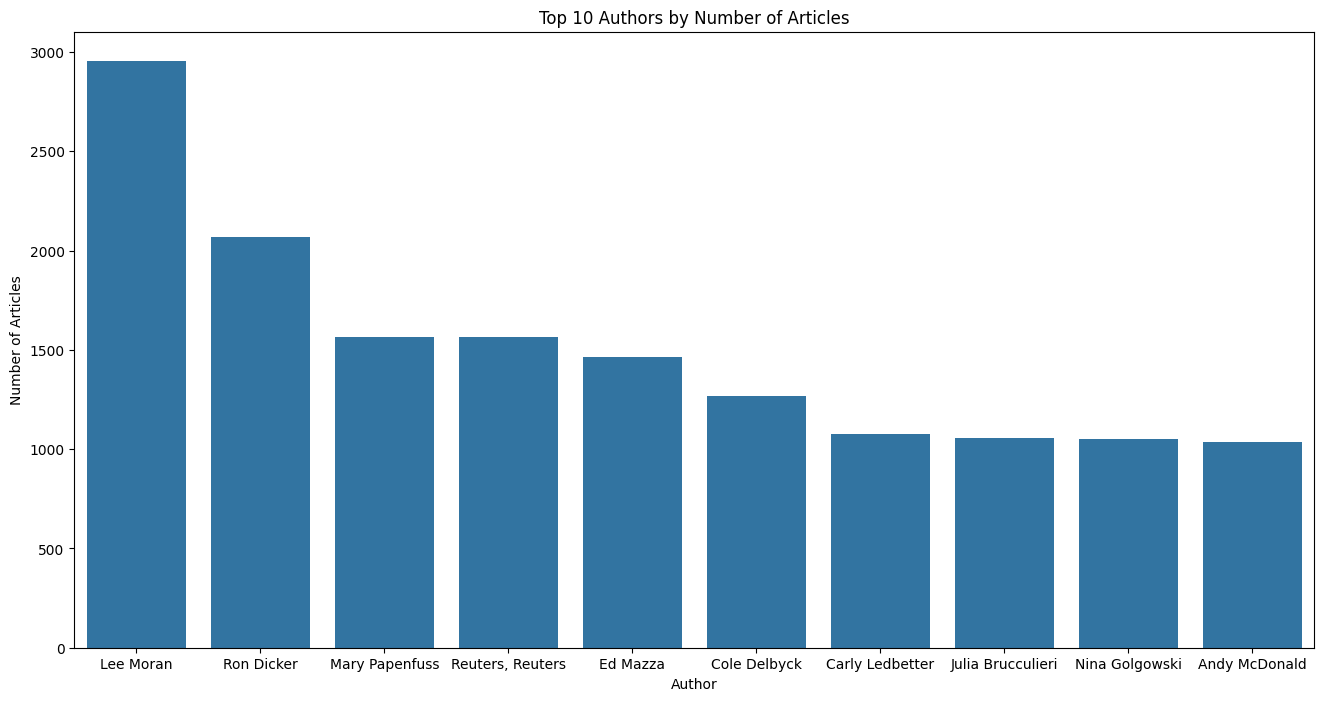

In [ ]:
#Top 10 Authors
top10_authors = df['authors'].value_counts().head(10)

#Plotting the Top 10 Authors
plt.figure(figsize=(16, 8))
sns.barplot(x=top10_authors.index, y=top10_authors.values )
plt.title('Top 10 Authors by Number of Articles')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

The graph provides clear visual representation of the produvtivity of these authors in terms of the articles produced. Lee Moran is the author with the highest number of articles with the count close to 3000 and Ron Dicker follows the second most.

## Analysis

For this analysis, we used two features: Headline and Short Description. Our pre-analysis steps included:
*   Tokenizing and vectorizing the headlines & Short Description.
*   Apply the Bag of Words as our baseline model.
*   Applying the same experiment with TF/IDF.
*   Classifying the news using an n-gram model (ranging from unigrams to trigrams) by training and splitting the data.
*   Applying the Word2Vec Model for Headline & Short Description.
*   Applying Google's news Word2Vec Model  for Headline & Short Description
*   Applying clustering for combined embedings of Headline and Short Description




To manage the computational load due to the dataset's size, we opted to take a sample for testing the model performance. The sampling was temporary, and we restored the full dataset before executing the final model evaluations

In [ ]:
#Selecting only 5000 rows on random basis
#df= df.sample(n=5000, random_state=42)

The initial stage of the preliminary analysis involved processing the data within the headline and short description fields. Our approach included converting all characters to lowercase, eliminating punctuation, and applying lemmatization to enhance the analytical process.

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def process_text(text):
  tokens = word_tokenize(text)
  for t in enumerate(tokens):
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stop_words]
  return tokens

In [ ]:
#Creating a new DF 'headlines' with only the 'headline' column
headlines = pd.DataFrame(df['headline'], columns =['headline'])
#Converting headlines to lowercase,removig any punctuation and non-english alphabets
headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','').str.replace('[^a-zA-Z0-9\s]', '')

<ipython-input-53-914d08e31269>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  headlines = headlines['headline'].str.lower().str.replace('[^\w\s]','').str.replace('[^a-zA-Z0-9\s]', '')


In [ ]:
#Initializing a lemmatizer object from the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()
#Lemmatize the headlines
lemma_headline = []
for line in headlines:
  lemma_headline += [process_text(line)]

In [ ]:
#Creating a new DF 'short description' with only the 'short_description' column
short_description = pd.DataFrame(df['short_description'], columns =['short_description'])
#Converting short description to lowercase and removing any punctuation and non-english alphabets
short_description = short_description['short_description'].str.lower().str.replace('[^\w\s]','').str.replace('[^a-zA-Z0-9\s]', '')


<ipython-input-55-e329ef1bb700>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  short_description = short_description['short_description'].str.lower().str.replace('[^\w\s]','').str.replace('[^a-zA-Z0-9\s]', '')


In [ ]:
#Lemmatize the short description
lemma_short_description = []
for line in short_description:
  lemma_short_description += [process_text(line)]

The Bag of Words and Document similarity models performed well when we sampled the data faced significant runtime issues when applied to the entire dataset. So we decided to store the code in the file but not run it.


###Bag of Words

Using Bag of words to Vectorize the sentences in Headline and Short Description

In [ ]:
#Initializing CountVectorizer with English stop words
def dummy(doc):
  return doc
cv = CountVectorizer(tokenizer= dummy,
                     preprocessor = dummy)
 #tokenizer= lambda x: word_tokenize(x), remove the stop_words='english'

#Fitting CountVectorizer to headline
cv.fit(lemma_headline)

#Printing the vocabulary with number of unique words i.e tokens
print('number of `tokens`', len(cv.vocabulary_))

In [ ]:
"""
#Transforming the headline sentences to BoW Format
dtm_headline = cv.transform(lemma_headline)
bow_headline = pd.DataFrame(dtm_headline.toarray(), columns=cv.get_feature_names_out())
bow_headline
"""

In [ ]:
"""
#Initializing CountVectorizer with English stop words
cv1 = CountVectorizer(stop_words='english')

#Fitting CountVectorizer to short_description
cv1.fit(lemma_short_description)

#Printing the vocabulary with number of unique words i.e tokens
print('number of `tokens`', len(cv1.vocabulary_))
cv1.vocabulary_
"""

In [ ]:
"""
#Transforming the short_description sentences to BoW Format
dtm_short_desc = cv1.transform(lemma_short_description)
bow_short_desc = pd.DataFrame(dtm_short_desc.toarray(), columns=cv1.get_feature_names_out())
bow_short_desc
"""

In [ ]:
"""
# Inverse transforming the bag-of-words representation
recognized_tokens_sentence0 = cv.inverse_transform([bow_headline.iloc[1]])
recognized_tokens_sentence0
"""

In [ ]:
"""
# Inverse transforming the bag-of-words representation
recognized_tokens_sentence1 = cv1.inverse_transform([bow_short_desc.iloc[2]])
recognized_tokens_sentence1
"""

###Document Similarity

The objective for document similarity was to build a model that gave an output of the headlines that had a similarity of more than 0.5 to the word that the user gave as input.

In [ ]:
"""
#Cosine similariry matrix for headlines
cos_sim_headline = pd.DataFrame(cosine_similarity(bow_headline, bow_headline))
cos_sim_headline
"""

In [ ]:
"""
#Cosine similariry matrix for short_description
cos_sim_short_description = pd.DataFrame(cosine_similarity(bow_short_desc, bow_short_desc))
cos_sim_short_description
"""

The scores range between 0 and 1, where 0 means no similarity with the headline and 1 means perfect similarity with the headline

In [ ]:
"""
#Query headline to find the similar headlines
q_headline = "cars"

q_headline_vector = cv.transform([q_headline])

#Result
pd.DataFrame(cosine_similarity(q_headline_vector, bow_headline))
"""

In the above model, when a certain word is given, the similiar headlines would be displayed.

We can see a score of 0.37, it could mean that it has moderate level of similarity of an headline containing the word "cars" or other words closely related to "cars" in the context used.

In [ ]:
"""
#Cosine Similrity between the quesry headline vector and all the BOW headlines vectors
similarity_matrix_headline = cosine_similarity(q_headline_vector, bow_headline)

similarity_threshold_headline = 0.05

#Finding headlines from BOW headlines that have similariry more than 0.05 threshold
matching_indices_headline = np.where(similarity_matrix_headline > similarity_threshold_headline)[1]
matching_headlines = [lemma_headline[i] for i in matching_indices_headline]

print("Matching headlines:")
for l_headline in matching_headlines:
    print(l_headline)
"""

###TF/IDF

In [ ]:
#Initializing TfidfVectorizer
tfid = TfidfVectorizer(tokenizer= dummy,
                     preprocessor = dummy)

#Fitting the Vectorizer to lemma_headline
tfid.fit(lemma_headline)

#transforming the headlines
tfid_headline = pd.DataFrame(tfid.transform(lemma_headline).toarray(), columns = tfid.get_feature_names_out())

In [ ]:
tfid_headline.head()

In [ ]:
#Initializing TfidfVectorizer
tfid1 = TfidfVectorizer(tokenizer= dummy,
                     preprocessor = dummy)

#Fitting the Vectorizer to lemma_short_description
tfid1.fit(lemma_short_description)

#transforming the short_description
tfid1_short_description = pd.DataFrame(tfid1.transform(lemma_short_description).toarray(), columns = tfid1.get_feature_names_out()) #Vectorize the short description

In [ ]:
tfid1_short_description.head()

###Basic model

In this section, we applied the unsupervised Bag of Words method for vectorizing the training and test data after splitting them into 80% for training and 20% for testing. Then, we evaluate the accuracy using Logistic Regression in a supervised learning context.

**Headline**

In [ ]:
#Defining the variables
X = lemma_headline
y = df['category']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing CountVectorizer with English stop words
vectorizer = CountVectorizer(tokenizer= dummy,
                     preprocessor = dummy)

#Fitting and transforimg CountVectorizer to train set
X_train_counts = vectorizer.fit_transform(X_train)

# vectorize the test set
X_test_counts = vectorizer.transform(X_test)

X_train_counts.toarray().shape

In [ ]:
# Evaluate the accuracy result using LogisticRegression

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, y_train)

# Predict on the test data
y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Based on the sample of the headline, we got around 57% accuracy using BoW model.

**Short Description**

In [ ]:
#Defining the variables
X = lemma_short_description
y = df['category']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing CountVectorizer with English stop words
vectorizer = CountVectorizer(tokenizer= dummy,
                     preprocessor = dummy) #lowercase=False

#Fitting and transforimg CountVectorizer to train set
X_train_counts = vectorizer.fit_transform(X_train)

# vectorize the test set
X_test_counts = vectorizer.transform(X_test)

X_train_counts.toarray().shape

In [ ]:
# Evaluate the accuracy result using LogisticRegression

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_counts, y_train)

# Predict on the test data
y_pred = model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Based on the sample of the short description using BoW model, we got around 45% accuracy, which is lower than using the headline.

The N-grams part of the code faced run time issues when the entire dataset was used. So, we stored them in the file without running them

###N-grams model

In this section, we applied the unsupervised N-grams model for vectorizing the training and test data after splitting them into 80% for training and 20% for testing. Then, we evaluate the accuracy using Logistic Regression in a supervised learning context.

**Headline**

In [ ]:
"""
#Defining the variables
X = lemma_headline
y = df['category']

#seting all the parameter to lowercase
lowercase= True

#Defining the range of n-grams
n_gram_range = (1,3)
"""

In [ ]:
#Splitting the data into train and test sets with stratification
def get_split_datasets(X, y, test_size=0.2, stratify=True):

    if stratify:
        # Stratifing the split to maintain the distribution of the categories across train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    else:
        # Performing a simple split without stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=None)

    return X_train, X_test, y_train, y_test


In [ ]:
"""
#Splitting the data into train and test sets with  out stratification
X_train, X_test, y_train, y_test = get_split_datasets(X, y, stratify=False)

# Initializing CountVectorizer
vectorizer_ngram = CountVectorizer(lowercase=lowercase, ngram_range=n_gram_range)

# Fitting and transforming the train ngram
X_train_ngram = vectorizer_ngram.fit_transform(X_train)

# vectorize the test set
X_test_ngram = vectorizer_ngram.transform(X_test)
"""

In [ ]:
"""X_train_ngram_df = pd.DataFrame(X_train_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())"""

In [ ]:
"""
# Evaluate the accuracy result using LogisticRegression
model_ngram = LogisticRegression(max_iter=1000)
model_ngram.fit(X_train_ngram, y_train)

# Predict on the test data
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Evaluate the model
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(accuracy_ngram)
"""

Based on the sample of the headline using the N-Grams Model, we got 36% accuracy. The result is lower than if we use BoW for Headline.

**Short Decription**

In [ ]:
#Defining the variables
X = lemma_short_description
y = df['category']

#seting all the parameter to lowercase
lowercase= True

#Defining the range of n-grams
n_gram_range = (1,3)

In [ ]:
"""
#Splitting the data into train and test sets with  out stratification
X_train, X_test, y_train, y_test = get_split_datasets(X, y, stratify=False)

# Initializing CountVectorizer
vectorizer_ngram = CountVectorizer(lowercase=lowercase, ngram_range=n_gram_range)

# Fitting and transforming the train ngram
X_train_ngram = vectorizer_ngram.fit_transform(X_train)

# vectorize the test set
X_test_ngram = vectorizer_ngram.transform(X_test)
"""

In [ ]:
"""X_train_ngram_df = pd.DataFrame(X_train_ngram.toarray(), columns=vectorizer_ngram.get_feature_names_out())"""

In [ ]:
"""
# Evaluate the accuracy result using LogisticRegression
model_ngram = LogisticRegression(max_iter=1000)
model_ngram.fit(X_train_ngram, y_train)

# Predict on the test data
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Evaluate the model
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(accuracy_ngram)
"""

Based on the sample of the short description using the N-Grams Model above, we got only 29% accuracy. The result is lower than if we use BoW for Short Description and Headline.

###Word2Vec Model

Word2Vec Model is used here to capture semantic relationships between words ensuring that the meaning and context of the data is preserved while classifying.

The first step in this process was to tokenize the headlines and remove any stop words from it




In [ ]:
# Tokenizing each headline into words
toke_headline = lemma_headline
#Initializing stop words for English
stop_words = set(stopwords.words('english'))
# Iterate through each index and list of tokens in 'toke_headline'
for indx, tokens in enumerate(toke_headline):
  # Remove words from the list of tokens if they are in the 'stop_words' set
  toke_headline[indx] = [word for word in tokens if word not in stop_words]

In [ ]:
# Create and train the Word2Vec model
headline_word2vec = Word2Vec(sentences=toke_headline, vector_size=100, window=10, min_count=3, workers=10, epochs=100)
headline_word2vec = headline_word2vec.wv

Parameter Reasoning:


*   A vector size of 100 was chosen to maintain a balance between capturing
semantic information but ensure there was not a high computational complexity.

*   We wanted the model to capture a broader context for each word and so a window=10 was chosen.

*   We set a min_count=3 to ensure that the words that occured very less did not affect the effeciency of the model. This helps filter out rare words and keep only the words that add value to the model.

*   workers=10 was used to speed up the process.

*   As the dataset has a large number of entries, an epochs=100 was chosen to ensure intricate patterns were captured.








In [ ]:
def get_word_embedding(word, model):
  # Check if the word is in the vocabulary of the Word2Vec model
    if word in model.key_to_index:
        return model[word]
    else:
        # Return a zero vector for Out-of-vocabulary
        return np.zeros(model.vector_size)

In [ ]:
# Listing message embeddings
headline_embeddings = []
for tokenized_document in toke_headline:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  h_word_embeddings = [get_word_embedding(word, headline_word2vec) for word in tokenized_document ]

  # Average the word embeddings to get a sentence embedding
  h_embedding = np.mean(h_word_embeddings if len(h_word_embeddings) >0 else [np.zeros(headline_word2vec.vector_size)], axis=0)

  # Add the current message embedding into the list of embeddings for all messages.
  headline_embeddings = headline_embeddings + [h_embedding]

headline_embeddings = np.array(headline_embeddings)

In [ ]:
#choose a headline
headline_chosen= df.iloc[1].headline.lower()
headline_chosen

In [ ]:
# Converting headline to lowercase
headline_chosen= df.iloc[1].headline.lower()

# Initialize an empty list
h_word_embeddings = []

# Tokenizing the chosen headline into words
for word in word_tokenize(headline_chosen):
  word_embedding = get_word_embedding(word, headline_word2vec)
  print(word, ":", word_embedding)
  h_word_embeddings = h_word_embeddings + [word_embedding]
  print("")

print("Embedding of the entire headline:", np.mean(h_word_embeddings, axis=0))

In [ ]:
print(len(headline_embeddings), len(y))


In [ ]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = get_split_datasets(headline_embeddings, y)

In [ ]:
# train the model
headline_word2vec_classification = LogisticRegression(max_iter=20000)
headline_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = headline_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

The accuracy of this model was 0.5000318755578222 or approximately 50% indicating that the model's performance is not significantly better than random chance on the classification task.

In [ ]:
# Tokenizing each short description into words
toke_desc = lemma_short_description

#Initializing stop words for English
stop_words = set(stopwords.words('english'))
# Remove words from the list of tokens if they are in the 'stop_words' set
for indx, tokens in enumerate(toke_desc):
  toke_desc[indx] = [word for word in tokens if word not in stop_words]

In [ ]:
# Create and train the Word2Vec model
desc_word2vec = Word2Vec(sentences=toke_desc, vector_size=60, window=6, min_count=1, workers=4, epochs=50)
desc_word2vec = desc_word2vec.wv
desc_embeddings = []
for tokenized_document in toke_desc:# Iterate through the messages
  # Calculate the embedding for each word in the message. Put them all in a list.
  d_word_embeddings = [get_word_embedding(word, desc_word2vec) for word in tokenized_document ]
  # Average the word embeddings to get a sentence embedding
  d_embedding = np.mean(d_word_embeddings if len(d_word_embeddings) >0 else [np.zeros(desc_word2vec.vector_size)], axis=0)
  # Add the current message embedding into the list of embeddings for all messages.
  desc_embeddings = desc_embeddings + [d_embedding]

We used different values for parameters than the one's for headlines to test if that creates a difference for the short description.


*  A vector size of 60 was used to check if the model was able to capture semantic information and also to check if reducing computation gave better resuts.

* A window of 6 was used for a more localized identification.


*   A min_count of 1 was used to ensure no words were missed out.

*   epochs of 50 were used to ensure overfitting did not occur while the model also captured patterns.



In [ ]:
desc_embeddings = np.array(desc_embeddings)

In [ ]:
X_train, X_test, y_train, y_test = get_split_datasets(desc_embeddings, y)
# train the model
desc_word2vec_classification = LogisticRegression(max_iter=20000)
desc_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = desc_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

The accuracy 0.40453270432232563, approximately 40.% shows that the Word2Vec model's performance on the classification task is not significantly better than random guessing. The accuracy is not upto the mark.

In [ ]:
#combine both headline embeddings and short description embeddings and called it combines embed
combined_embed = []
for i in range(0,len(desc_embeddings)):
  combined_embed = combined_embed + [np.append(desc_embeddings[i], headline_embeddings[i])]
combined_embed = np.array(combined_embed)


In [ ]:
# Model with both Word2Vec embeddings
X_train, X_test, y_train, y_test = get_split_datasets(combined_embed, y)
# train the model
comb_word2vec_classification = LogisticRegression(max_iter=20000)
comb_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = comb_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

The combined embedding model's accuracy was around 53% which is better than the individual embedding models showing that a better classification is done when the headlines and short descriptions are combined together.

###Google News Model Word2Vec for headlines

Subsequently, we opted to utilize the Word2Vec model from Google News for  embedding and classifying the data.

In [ ]:
#Load the google news model
model_word2vec = api.load('glove-wiki-gigaword-300')

We downloaded the google news model and created embeddings for headlines, short description and also combined these embeddings to perform classification on them.

In [ ]:
# Initialize an empty list
hdl_embeddings = []
# Iterate through each tokenized headline
for h in toke_headline:
  h_embeddings = [get_word_embedding(word, model_word2vec) for word in h ]
  hd_embedding = np.mean(h_embeddings if len(h_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  hdl_embeddings = hdl_embeddings + [hd_embedding]
# Convert the list of headline embeddings into a NumPy array.
hdl_embeddings = np.array(hdl_embeddings)

In [ ]:
# Check the shape of the 'hdl_embeddings' NumPy array
hdl_embeddings.shape

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hdl_embeddings, df['category'], test_size=0.2, random_state=42)

# train the model
model_word2vec_classification = LogisticRegression(max_iter=20000)
model_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model_word2vec_classification.predict(X_test)

# Evaluate the model
f1_score = sklearn.metrics.f1_score(y_test, y_pred2,average='weighted')
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")



The google news model gave an accuracy of around 45% which is lesser than the model we created. This shows that creating a model on our own gives us more power to adjust parameters and produce better accuracy.

Google News Model Word2Vec for short description

The same process was followed for short description

In [ ]:
# Initialize an empty list
s_embeddings = []
# Iterate through each tokenized headline
for sd in toke_desc:
  sd_embeddings = [get_word_embedding(word, model_word2vec) for word in sd ]
  sd_embedding = np.mean(sd_embeddings if len(sd_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  s_embeddings = s_embeddings + [sd_embedding]
  # Convert the list of headline embeddings into a NumPy array.
s_embeddings = np.array(s_embeddings)

In [ ]:
# Check the shape of the 'hdl_embeddings' NumPy array.
s_embeddings.shape

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(s_embeddings, df['category'], test_size=0.2, random_state=42)

# train the model
model_word2vec_classification = LogisticRegression(max_iter=20000)
model_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model_word2vec_classification.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")

We can see that the accuracy score for short description by the google news model is also lower than the model we created. This shows that creating a model on our own gives us more power to adjust parameters and produce better accuracy.

Further the embeddings of headline and short description was combined to check classification accuracy on them using multiple supervised machine learning models.

In [ ]:
# Initialize an empty list
combined_embedding = []
# Iterate through the indices of s_embeddings.
for i in range(0,len(s_embeddings)):
  # Concatenate the sentence embedding with the corresponding headline embedding
  combined_embedding = combined_embedding + [np.append(s_embeddings[i], hdl_embeddings[i])]
# Convert the list of combined embeddings into a NumPy array
combined_embedding = np.array(combined_embedding)

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_embedding, df['category'], test_size=0.2, random_state=42)

# train the model
model_word2vec_classification = LogisticRegression(max_iter=20000)
model_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model_word2vec_classification.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")


We can see that the accuracy score by the google news model is also lesser than the model we created. This shows that creating a model on our own gives us more power to adjust parameters and produce better accuracy.

A decision tree classifier was used on the combined embeddings to analyse whether it gave better results while the google news model was used.

In [ ]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_embedding, df['category'], test_size=0.2, random_state=42)

#Train the model
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

#Predict on test set
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred_decision_tree))


The decision tree model's accuracy was much below the logistic regression model. This might be caused to underfitting were the model was too complex to fit the data and missed on capturing patterns.

A random forest classifier was also used to check if accuracy improved.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_embedding, df['category'], test_size=0.2, random_state=42)

#Train the data
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_random_forest = model_random_forest.predict(X_test)


print(accuracy_score(y_test, y_pred_random_forest))

The accuracy was better than decision tree but not as good as logistic regression proving logistice regression gave the best accuracy results for this data.

TF-IDF assigns weights to terms based on their importance in a document relative to the entire corpus. This helps in distinguishing important terms from common ones. In news articles, certain terms may be repeated frequently within articles but may not be significant across the entire corpus. TF-IDF helps in identifying and prioritizing such terms. By assigning weights to terms, TF-IDF can effectively reduce the dimensionality of the feature space. This is crucial in text analysis, especially with large corpora like news articles, where the number of unique terms can be vast. Reducing dimensionality can improve computational efficiency and mitigate the "curse of dimensionality."

In [ ]:
#TFIDF Weighted Average
import math
headline_embeddings = []
count = 0
for tokenized_document in toke_headline:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  h_word_embeddings = [(get_word_embedding(word, headline_word2vec)) for word in tokenized_document]
  h_word_tfidf = [tfid_headline[word].iloc[count] if word in tfid_headline else 0.0 for word in tokenized_document]
  sum_tf = math.fsum(h_word_tfidf)
  h_word_weights = [i / sum_tf for i in h_word_tfidf] if sum_tf>0 else np.zeros(len(tokenized_document))

  # Average the word embeddings to get a sentence embedding
  #h_embedding = math.fsum(h_word_embeddings*h_word_weights if len(h_word_embeddings) >0 else [np.zeros(headline_word2vec.vector_size)], axis=0)
  h_embedding = np.zeros(headline_word2vec.vector_size)
  index = 0
  for word_embed in h_word_embeddings:
    h_embedding = [a+b for a,b in zip(h_embedding,(word_embed*h_word_weights[index]))]
    index +=1

  # Add the current message embedding into the list of embeddings for all messages.
  headline_embeddings = headline_embeddings + [h_embedding]
  count += 1
headline_embeddings = np.array(headline_embeddings)


desc_embeddings = []
count = 0
for tokenized_document in toke_desc:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  d_word_embeddings = [get_word_embedding(word, desc_word2vec) for word in tokenized_document ]
  d_word_tfidf = [tfid1_short_description[word].iloc[count] if word in tfid1_short_description else 0.0 for word in tokenized_document]
  sum_tf = math.fsum(d_word_tfidf)
  d_word_weights = [i / sum_tf for i in d_word_tfidf] if sum_tf>0 else np.zeros(len(tokenized_document))

  # Average the word embeddings to get a sentence embedding
  d_embedding = np.zeros(desc_word2vec.vector_size)
  index = 0
  for word_embed in d_word_embeddings:
    d_embedding = [a+b for a,b in zip(d_embedding,(word_embed*d_word_weights[index]))]
    index += 1


  # Add the current message embedding into the list of embeddings for all messages.
  desc_embeddings = desc_embeddings + [d_embedding]
  count +=1
desc_embeddings = np.array(desc_embeddings)

combined_embed = []
for i in range(0,len(desc_embeddings)):
  combined_embed = combined_embed + [np.append(desc_embeddings[i], headline_embeddings[i])]
combined_embed = np.array(combined_embed)

In [ ]:
# Model with both Word2Vec embeddings with TFIDF Weighted Average
X_train, X_test, y_train, y_test = get_split_datasets(combined_embed, y)
# train the model
comb_word2vec_classification = LogisticRegression(max_iter=20000)
comb_word2vec_classification.fit(X_train, y_train)

# Predict on the test data
y_pred2 = comb_word2vec_classification.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

We are also considering doing the clustering for the combined Embedings for it to provide the natural groups based on headlines and short descriptions classifiaction. For this, we are doing the clustering using K-means  

###Clustering

In [ ]:
inertia = []

#Providing range from 1 to 10
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(combined_embed)
    inertia.append(kmeans.inertia_)

#PLotting the elbow plot
plt.figure(figsize=(8, 4))
plt.plot(range_values, inertia, '-o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.show();


From the above Elbow Plot, we could see that the major trend difference between 2 and 3 and after 3, there was only slight differences. Hence, we are considering the number of clusters to be 3. As since there is lot of data, we are trying to reduce the dimnesions using PCA and then doing the K-means clustering

In [ ]:
from sklearn.decomposition import PCA

# Performing PCA to reduce to three dimensions
pca = PCA(n_components=3)

#Fitting and transforming the PCA to combined embedings
combined_embed_reduced = pca.fit_transform(combined_embed)

# Performing K-Means clustering on combined embedings reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_embed_reduced)

df['cluster']  = kmeans.labels_
df

Analyzing each cluster


In [ ]:
cluster_1 = df[df['cluster'] == 0]

#Printing the shape of the cluster
print(f"Number of items in first cluster:: {cluster_1.shape[0]}")

# Printing the cluster data
print(cluster_1[['headline', 'short_description']].head())


In [ ]:
cluster_2 = df[df['cluster'] == 1]

#Printing the shape of the cluster
print(f"Number of items in second cluster: {cluster_2.shape[0]}")

# Printing the cluster data
print(cluster_2[['headline', 'short_description']].head())

In [ ]:
cluster_3 = df[df['cluster'] == 2]

#Printing the shape of the cluster
print(f"Number of items in third cluster {cluster_3.shape[0]}")

# Printing the cluster data
print(cluster_3[['headline', 'short_description']].head())


In [ ]:
import pandas as pd
import plotly.express as px

#Creating DF
df_3d = pd.DataFrame(combined_embed_reduced, columns=['PC1', 'PC2', 'PC3'])

# Adding cluster labels from KMeans clustering to the above DF
df_3d['cluster_labels'] = kmeans.labels_

# Plotting the 3D scatter plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3',
                    color='cluster_labels',
                    title="Clustering")

fig.update_traces(marker_size = 3)

# Show the plot
fig.show()

##Sentiment Analysis

**Create the Word2Vec model for the Sentiment Analysis**

In [ ]:

# Build Word2Vec
sentimen_word2vec = Word2Vec(sentences=toke_desc, vector_size=60, window=6, min_count=1, workers=4, epochs=50) # negative=50 , epochs=50, vector_size=300
sentimen_word2vec = sentimen_word2vec.wv


# Get the word embedding
sentimen_embeddings = []

for tokenized_document in toke_desc:# Iterate through the messages

  # Calculate the embedding for each word in the message. Put them all in a list.
  d_sent_embeddings = [get_word_embedding(word, sentimen_word2vec) for word in tokenized_document]

  # Average the word embeddings to get a sentence embedding
  d_embedding = np.mean(d_sent_embeddings if len(d_sent_embeddings) >0 else [np.zeros(sentimen_word2vec.vector_size)], axis=0)

  # Add the current message embedding into the list of embeddings for all messages.
  sentimen_embeddings = sentimen_embeddings + [d_embedding]

sentimen_embeddings = np.array(sentimen_embeddings)

**Evaluate the model by Similarity test**

In [ ]:
# Create the ideal positive and negative words
ideal_pos = ["breakthrough", "revolutionary", "uplifting", "success", "innovative", "pioneering", "empowering", "miraculous", "flourishing", "renowned"]
ideal_neg = ["catastrophe", "scandalous", "devastating", "oppressive", "perilous", "grim", "corrupt", "turmoil", "bankrupt", "brutal"]

In [ ]:
# Test negative sentence
test_sentence = word_tokenize("Due to unprecedented wildfires, thousands of homes have been destroyed, leaving many residents displaced and in despair.")

In [ ]:
# Accuracy in positive sentiment
sentimen_word2vec.n_similarity(test_sentence, ideal_pos)

In [ ]:
# Accuracy in negative sentiment
sentimen_word2vec.n_similarity(test_sentence, ideal_neg)

In [ ]:
# Test positive sentence
test_sentence = word_tokenize("Researchers have made a groundbreaking discovery in renewable energy, promising a future of sustainable and clean power for generations to come")

In [ ]:
# Accuracy in positive sentiment
sentimen_word2vec.n_similarity(test_sentence, ideal_pos)

In [ ]:
# Accuracy in negative sentiment
sentimen_word2vec.n_similarity(test_sentence, ideal_neg)

Based on the similarity test, we find that the model shows a higher similarity score when identifying positive sentiment compared to negative sentiment. This indicates that the model is better at recognizing positive sentiments. Despite this, the model still correctly predicts the sentiment for each test sentence, as reflected by the similarity scores.

**Add the new Sentiment label to the DataFrame**

In [ ]:
def sentiment(desc):
  return sentimen_word2vec.n_similarity(desc, ideal_pos) - sentimen_word2vec.n_similarity(desc, ideal_neg)

df["tokenized_desc"] = toke_desc


# Create the histogram of the sentiment score
sentiment_score = df["tokenized_desc"].apply(lambda x: sentiment(x) if x else None)
sentiment_score.hist(bins=50)

In [ ]:
# Add the sentiment label to the dataframe
df['sentiment_label'] = sentiment_score.apply(lambda x: "Positive" if x is not None and x > 0 else "Negative" if x is not None and x < 0 else "Neutral" if x == 0 else None)

In [ ]:
# Display the distribution of sentiment labels
df['sentiment_label'].hist()
print((df['sentiment_label'].value_counts()/len(df))*100)

In [ ]:
# Show the final data
df.head()